In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
# load uvm_courses.csv as courses_df
courses_df = pd.read_csv('uvm_courses.csv')

# load enrollment_data_combined.csv
enrollment_df = pd.read_csv('enrollment_data_combined.csv')

In [ ]:
courses_df

,id,type,catalog_id,png_id,text_id,script,model,sys_prompt,user_prompt,temperature,max_new_tokens,path,misc,content,updated_at
0,830785,both,231174_gr_1977_1978,231174_gr_1977_1978_34_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:50.478688
1,830786,both,231174_ug_1974_1975,231174_ug_1974_1975_145_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:50.509859
2,830787,both,231174_gr_1992_1994,231174_gr_1992_1994_112_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:50.540686
3,831699,both,231174_ug_1981_1982,231174_ug_1981_1982_20_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:03:20.093444
4,830788,both,231174_ug_1979_1980,231174_ug_1979_1980_26_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:50.571247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41826,830759,both,231174_ug_1979_1980,231174_ug_1979_1980_81_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:49.655451
41827,830760,both,231174_ug_1978_1979,231174_ug_1978_1979_269_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:49.687817
41828,830761,both,231174_ug_1978_1979,231174_ug_1978_1979_184_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:49.721019
41829,830783,both,231174_gr_1969_1970,231174_gr_1969_1970_43_png,NaN,annotate,gemini/gemini-2.5-flash,# Role\nYou are an information extraction assi...,NaN,0.7,60000,/mnt/compethicslab/cc/data/231174/annotations/...,NaN,"\n{\n ""schema_version"": ""1.2"",\n ""metadata"":...",2025-10-24 23:02:50.417563


In [22]:
# For this project, we're just interested in UVM courses
uvm_courses_df = courses_df[courses_df['ipeds_id'] == '231174']

KeyError: 'ipeds_id'

In [5]:
uvm_courses_df.shape, enrollment_df.shape

((221784, 18), (261831, 30))

# Initial Data Cleaning

In [ ]:
# Add subject/department column to enrollment_df
enrollment_df['Department'] = enrollment_df[' Subj'].fillna(enrollment_df[' Dept'])

In [7]:
# filter enrollment_df to only include rows that we're fairly confident are just courses
course_dept_counts = enrollment_df.groupby('Title')['Department'].nunique().reset_index()
course_dept_counts = course_dept_counts.sort_values(by='Department', ascending=False).reset_index(drop=True)
course_dept_counts

,Title,Department
0,Independent Study,139
1,Undergraduate Research,88
2,Internship,85
3,Teaching Assistantship,79
4,Special Topics,78
...,...,...
26719,Found Experience Physical Educ,1
26720,Found Elec Engng Recitation,1
26721,Found & Frontiers of Sci & Soc,1
26722,Foucault,1


In [ ]:
# What proportion of courses are offered in just one department? 89%. Two departments? 8.6%
one_dept_courses = course_dept_counts[course_dept_counts['Department'] == 1]
two_dept_courses = course_dept_counts[course_dept_counts['Department'] == 2]

100*(one_dept_courses.shape[0] / course_dept_counts.shape[0]), 100*(two_dept_courses.shape[0] / course_dept_counts.shape[0])

(89.35413860200569, 8.569076485556055)

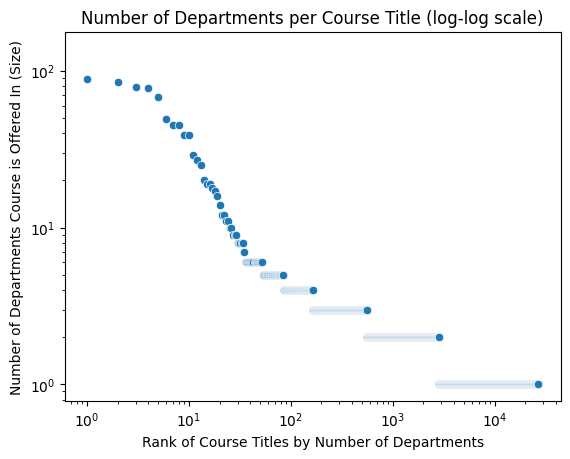

In [19]:
# Plot size - Rank plot of number of departments per course title
import numpy as np
from scipy import stats

# Plot size - Rank plot of number of departments per course title
sns.scatterplot(data=course_dept_counts, x=course_dept_counts.index, y='Department')

# Calculate linear regression on log-log scale
# x = np.log10(course_dept_counts.index)
# y = np.log10(course_dept_counts['Department'])
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# # Plot regression line
# x_line = np.array([course_dept_counts.index.min(), course_dept_counts.index.max()])
# y_line = 10**(slope * np.log10(x_line) + intercept)
# plt.plot(x_line, y_line, 'r-', label=f'y = {10**intercept:.2f}x^{slope:.2f}\nR² = {r_value**2:.3f}')

plt.yscale('log')
plt.xscale('log')
plt.title('Number of Departments per Course Title (log-log scale)')
plt.xlabel('Rank of Course Titles by Number of Departments')
plt.ylabel('Number of Departments Course is Offered In (Size)')
# plt.legend()
plt.show()

In [20]:
enrollment_df

,Subj,#,Title,Comp Numb,Sec,Ptrm,Lec Lab,Attr,Camp Code,Coll Code,Max Enrollment,Current Enrollment,True Max,Start Time,End Time,Days,Credits,Bldg,Room,GP Ind,Instructor,NetId,Email,Fees,XListings,Year,Semester,Dept,Instructor First,Instructor Last,Department
0,ABIO,6020,ABIO Graduate Seminar,13772,A,1,SEM,NaN,M,CALS,20,10,NaN,13:10,14:00,F,1,TERRIL,308,Y,"Machado de Sant'Anna, Felipe",fsantann,Felipe.Santanna@uvm.edu,NaN,,2025,Spring,NaN,NaN,NaN,ABIO
1,ABIO,6391,Master's Thesis Research,13766,A,1,TD,NaN,M,CALS,20,1,NaN,TBA,NaN,,1 to 18,NaN,NaN,N,"Kraft, Jana",jkraft1,Jana.Kraft@uvm.edu,NaN,,2025,Spring,NaN,NaN,NaN,ABIO
2,ABIO,6391,Master's Thesis Research,13767,B,1,TD,NaN,M,CALS,20,2,NaN,TBA,NaN,,1 to 18,NaN,NaN,N,"Barlow, John William",jbarlow,John.Barlow@uvm.edu,NaN,,2025,Spring,NaN,NaN,NaN,ABIO
3,ABIO,6391,Master's Thesis Research,13768,C,1,TD,NaN,M,CALS,20,2,NaN,TBA,NaN,,1 to 18,NaN,NaN,N,"Smith, Julie M",jmsmith,Julie.M.Smith@uvm.edu,NaN,,2025,Spring,NaN,NaN,NaN,ABIO
4,ABIO,6391,Master's Thesis Research,13769,D,1,TD,NaN,M,CALS,20,0,NaN,TBA,NaN,,1 to 18,NaN,NaN,N,"Zhao, Feng-Qi",fzhao,fzhao@uvm.edu,NaN,,2025,Spring,NaN,NaN,NaN,ABIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261826,NaN,195,Psychology of Women,92397,E,NaN,L,NaN,C,NaN,20,0,NaN,16:30,19:00,W,3,DEWEY,238,NaN,Downey Sar,NaN,NaN,NaN,NaN,1995,Fall,WST,NaN,NaN,WST
261827,NaN,195,Women & Depression,92416,F,NaN,L,NaN,C,NaN,1,19,NaN,TBA,NaN,,3,NaN,NaN,NaN,Gleeson,NaN,NaN,NaN,NaN,1995,Fall,WST,NaN,NaN,WST
261828,NaN,195,Women's Spirituality,92417,G,NaN,L,NaN,C,NaN,20,18,NaN,16:10,19:00,W,3,L/L-B,B101,NaN,Cleary,NaN,NaN,NaN,NaN,1995,Fall,WST,NaN,NaN,WST
261829,NaN,195,Gender & Law,92492,H,NaN,L,NaN,C,NaN,20,13,NaN,17:40,20:30,R,3,69 UHT,100,NaN,Taormina,NaN,NaN,NaN,NaN,1995,Fall,WST,NaN,NaN,WST


In [ ]:
# filter the enrollment dataframe to just proposed courses - only listed in 1 department or X-listed if available

filtered_enrollment_df = enrollment_df[enrollment_df['Title'].isin(course_dept_counts[course_dept_counts['Department'] == 1]['Title'])]

In [8]:
# Merge dataframes using fuzzymatching on titles and years
merged_year_title_df = pd.merge(enrollment_df, uvm_courses_df, left_on=['Year', 'Title'], right_on=['start_yr', 'Title'], how='outer', indicator=True)

In [9]:
# The merged dataset is 11x larger than the original UVM courses dataset (duplicate courses ... ?) and about 9.5x larger than the enrollment dataset
merged_year_title_df.shape[0] / uvm_courses_df.shape[0], merged_year_title_df.shape[0] / enrollment_df.shape[0]

(11.247019622695957, 9.526790181452922)

In [10]:
uvm_courses_df.shape[0]

221784

In [11]:
merged_on_title_df

NameError: name 'merged_on_title_df' is not defined

In [ ]:
uvm_courses_df.columns

Index(['ipeds_id', 'cat_type', 'start_yr', 'end_yr', 'page_num', 'col_num',
       'type', 'annote_id', 'Department', 'Number', 'Title', 'Description',
       'Prerequisites', 'Credits', 'Teacher', 'decade', 'quinquennium',
       'DepartmentCleaned'],
      dtype='object')

In [ ]:
enrollment_df.columns

Index([' Subj', '#', 'Title', 'Comp Numb', 'Sec', 'Ptrm', 'Lec Lab', 'Attr',
       'Camp Code', 'Coll Code', 'Max Enrollment', 'Current Enrollment',
       'True Max', 'Start Time', 'End Time', 'Days', 'Credits', 'Bldg', 'Room',
       'GP Ind', 'Instructor', 'NetId', 'Email', 'Fees', 'XListings', 'Year',
       'Semester', ' Dept', 'Instructor First', 'Instructor Last',
       'Department'],
      dtype='object')

In [ ]:
# We have data for college code from 2017 onwards. What is the college code before that?
enrollment_df[enrollment_df['Coll Code'].isnull()]['Year'].min(), enrollment_df[enrollment_df['Coll Code'].isnull()]['Year'].max()

(np.int64(1995), np.int64(2016))

In [ ]:
enrollment_df[~enrollment_df['Coll Code'].isnull()]['Year'].min(), enrollment_df[~enrollment_df['Coll Code'].isnull()]['Year'].max()

(np.int64(2017), np.int64(2025))

In [ ]:
enrollment_df['Coll Code'].value_counts(dropna=False)

Coll Code
NaN      154766
CAS       30380
GRAD      22556
CEMS      11383
CALS       8502
CNHS       8130
CC         6283
CESS       5758
RSENR      5707
GI         2568
COM        2295
GSB        2122
LCOM        824
HONOR       396
PLHC        121
PHLC         37
UNKN          3
Name: count, dtype: int64